Building url and reading data

In [19]:
import urllib
import html2text
import matplotlib.pyplot as plt
import pandas as pd

get data from url, and remove html tags

In [20]:
link = "http://www.isc.ac.uk/cgi-bin/web-db-run?request=COMPREHENSIVE&out_format=ISF2&searchshape=RECT&bot_lat=&top_lat=&left_lon=&right_lon=&ctr_lat=&ctr_lon=&radius=&max_dist_units=deg&srn=&grn=&start_year=2021&start_month=2&start_day=28&start_time=00%3A00%3A00&end_year=2021&end_month=3&end_day=01&end_time=00%3A00%3A00&min_dep=&max_dep=&min_mag=5.5&max_mag=&req_mag_type=&req_mag_agcy=GCMT&min_def=&max_def=&include_magnitudes=on&include_links=on&include_headers=on&include_comments=on"
f = urllib.request.urlretrieve(link, 'test.txt')
#myfile = f.read()
j = open('test.txt')
k = j.read()
rendered_content = html2text.html2text(k)

quakeml = urllib.request.urlretrieve('http://www.isc.ac.uk/cgi-bin/web-db-run?request=COMPREHENSIVE&out_format=QuakeML&searchshape=RECT&bot_lat=&top_lat=&left_lon=&right_lon=&ctr_lat=&ctr_lon=&radius=&max_dist_units=deg&srn=&grn=&start_year=2021&start_month=2&start_day=28&start_time=00%3A00%3A00&end_year=2021&end_month=3&end_day=01&end_time=00%3A00%3A00&min_dep=&max_dep=&min_mag=&max_mag=5.5&req_mag_type=&req_mag_agcy=GCMT&min_def=&max_def=&include_magnitudes=on&include_links=on&include_headers=on&include_comments=on', 'quakeml.xml')

save to a text file

In [4]:
quakeml

('quakeml.txt', <http.client.HTTPMessage at 0x7fc9c8fa2e60>)

In [12]:
with open('rendered_content.txt','w') as f:
    f.write(rendered_content)

open from text file

In [5]:
with open("rendered_content.txt", "r") as f:
    r = f.read()
with open("quakeml.txt", "r") as f:
    ql = f.read()

In [18]:
import obspy
cat = obspy.read_events('quakeml.xml')
cat[0].resource_id.id[-9:]

'619876796'

split at "Event ". other than the first one, this will divide out the events.

# find normalised_stf


for each event, split at new lines

see if each line has the normalised_stf title. if it does then take the following 32 lines as these contain the data.

in the future, could automate to check its 32 lines?

with those 32 lines, split them at space. then get rid of everything which isn't a number, and put float versions of the string numbers into a list

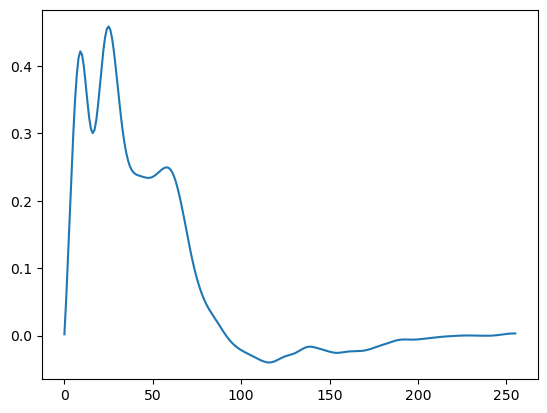

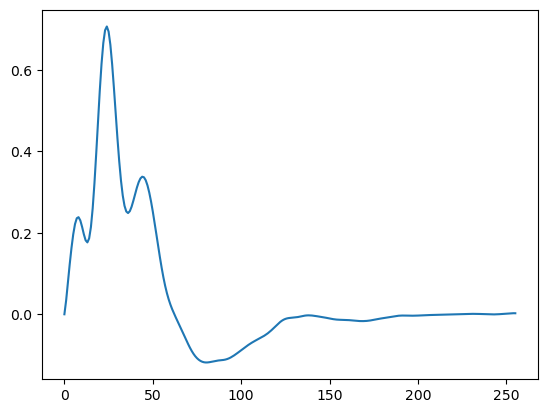

In [16]:
for i in range(1, len(sp)):
     split_at_new_lines = sp[i].split('\n')
     for s in range(0, len(split_at_new_lines)):
          if '#NORMALISED_STF' in split_at_new_lines[s]:
               stf = split_at_new_lines[s+1:s+33]
               stf_list = []
               for line in stf:
                    for item in line.split(' '):
                         if item not in ['', '#', '(#', ')']:
                              stf_list.append(float(item))
               plt.plot(stf_list)
               plt.show()

not all earthquakes will have normalised_stf available

# now we'd like to find the eq magntiude

the magnitude table is the last item in each event, so take the text between 'Magnitude' and 'Event'. However the last event doesn't have an Event after it, it has a stop so break at that. The first two bits after splitting at magnitude aren't events. 

Then replace new line characters with spaces, ignore everything up to OrigID (the headers) and skip the final [ character.

add the resulting data to mag table

DONE *(could probably do it splitting by event first...)*

In [13]:
mag_table = []
for s in range(1,len(sp)):
    if s < len(sp)-1:
        mag_table.append((sp[s].split('Magnitude')[1]).replace('\n',' ').partition('OrigID')[-1].partition('[')[0])
    else:
        mag_table.append(((sp[s].split('Magnitude')[1].split('STOP')[0]).replace('\n',' ').partition('OrigID')[-1].partition('[')[0]))
print(mag_table)
                        

[' ML 5.5 GUC 616530271 mb 4.7 0.1 25 IDC 614952578 mbtmp 4.7 0.1 27 IDC 614952578 ML 4.4 0.1 2 IDC 614952578 MS 5.2 0.0 52 IDC 614952578 Mw 5.8 IPGP 614910378 Mwp 5.6 8 PTWC 615926684 M 5.4 13 CATAC 615648989 mb 5.3 0.3 13 CATAC 615648989 mB 5.7 0.2 13 CATAC 615648989 MLv 6.0 0.2 5 CATAC 615648989 MwmB 5.2 0.4 13 CATAC 615648989 MwMwp 5.3 0.4 11 CATAC 615648989 Mwp 5.5 0.1 11 CATAC 615648989 mb 5.3 VAO 619149799 M 5.3 66 GFZ 618820748 mb 5.3 0.2 66 GFZ 618820748 Mw 5.5 67 GFZ 618820749 mb 5.4 18 MOS 616103342 MS 5.4 14 MOS 616103342 mb 5.3 0.0 334 NEIC 615862197 Ms_20 5.3 0.0 497 NEIC 615862197 Mwb 5.8 0.0 105 NEIC 615862197 Mww 5.6 GUC 615862197 MW 5.6 149 GCMT 615347625 mb 5.3 INMG 616163375 Ms 5.5 INMG 616163375 MW 5.4 INMG 616163375 Mww 5.5 0.1 39 NEIC 615862200 mb 5.3 0.1 255 ISC 619310502 MS 5.3 0.1 313 ISC 619310502 ', ' mb 5.2 73 BJI 615527622 mB 5.5 44 BJI 615527622 Ms 5.2 60 BJI 615527622 Ms7 5.0 63 BJI 615527622 Mw 5.4 77 GFZ 618820753 mb 5.5 61 MOS 616103343 MS 5.2 18 MOS 

remove beginning white space

split at spaces

In [18]:
single_mag_list = []
l_mags = mag_table[-1].lstrip().split(' ')
start = 0
for l in range(len(l_mags)):
    if len(l_mags[l])==9:
        single_mag_list.append(l_mags[start:l+1])
        start = l+1


In [22]:
single_mag_list

[['mb', '5.1', '76', 'BJI', '615527629'],
 ['mB', '5.9', '61', 'BJI', '615527629'],
 ['Ms', '5.9', '85', 'BJI', '615527629'],
 ['Ms7', '5.6', '79', 'BJI', '615527629'],
 ['mb', '4.9', '0.1', '29', 'IDC', '614952743'],
 ['mbtmp', '4.9', '0.1', '32', 'IDC', '614952743'],
 ['ML', '5.3', '0.4', '3', 'IDC', '614952743'],
 ['MS', '5.3', '0.0', '58', 'IDC', '614952743'],
 ['mb', '5.4', '0.2', 'MCSM', '619462343'],
 ['mb', '5.6', '46', 'MOS', '616103352'],
 ['MS', '5.6', '28', 'MOS', '616103352'],
 ['MwMwp', '5.7', '165', 'NOU', '615674062'],
 ['Mw', '6.0', 'IPGP', '614910512'],
 ['6.1', 'ISC-PPSM', '619595513'],
 ['M', '5.8', '37', 'GFZ', '618820767'],
 ['mb', '5.4', '0.2', '37', 'GFZ', '618820767'],
 ['Mw', '5.9', '64', 'GFZ', '618820768'],
 ['mb', '5.5', '0.0', '229', 'NEIC', '615862333'],
 ['Ms_20', '5.7', '0.0', '516', 'NEIC', '615862333'],
 ['Mwb', '5.9', '0.0', '119', 'NEIC', '615862333'],
 ['MW', '5.9', '179', 'GCMT', '615347643'],
 ['Mww', '5.9', '0.0', '54', 'NEIC', '615862335'],
 ['

In [20]:
df = pd.DataFrame(columns = ['mag_type', 'mag','err','Nsta','author','orig_id'])
for mag_line in single_mag_list:
    posn = 0
    mag_type, mag, err, Nsta, author, orig_id = '', None, None, None, '',''
    if mag_line[posn][0].lower()=='m':
        mag_type = mag_line[posn]
        posn += 1
    else:
        mag_type = ''
    if '.' in mag_line[posn]:
        mag = float(mag_line[posn])
        posn += 1
    if '.' in mag_line[posn]:
        print(posn)
        err = float(mag_line[posn])
        print(err)
        posn += 1
    try:
        int(mag_line[posn])
        Nsta = int(mag_line[posn])
        posn += 1
    except Exception:
        pass
    if mag_line[posn].isalpha():
        author = mag_line[posn]
        posn += 1
    if len(mag_line[posn])==9:
        orig_id = mag_line[posn]
        posn += 1
    print(mag_line)
    print(mag_type, mag, err, Nsta, author, orig_id)
    row = {'mag_type':mag_type, 'mag':mag,'err':err,'Nsta':Nsta,'author':author,'orig_id':orig_id}
    df = pd.concat([df, pd.DataFrame(row, index=[0])])

['mb', '5.1', '76', 'BJI', '615527629']
mb 5.1 None 76 BJI 615527629
['mB', '5.9', '61', 'BJI', '615527629']
mB 5.9 None 61 BJI 615527629
['Ms', '5.9', '85', 'BJI', '615527629']
Ms 5.9 None 85 BJI 615527629
['Ms7', '5.6', '79', 'BJI', '615527629']
Ms7 5.6 None 79 BJI 615527629
2
0.1
['mb', '4.9', '0.1', '29', 'IDC', '614952743']
mb 4.9 0.1 29 IDC 614952743
2
0.1
['mbtmp', '4.9', '0.1', '32', 'IDC', '614952743']
mbtmp 4.9 0.1 32 IDC 614952743
2
0.4
['ML', '5.3', '0.4', '3', 'IDC', '614952743']
ML 5.3 0.4 3 IDC 614952743
2
0.0
['MS', '5.3', '0.0', '58', 'IDC', '614952743']
MS 5.3 0.0 58 IDC 614952743
2
0.2
['mb', '5.4', '0.2', 'MCSM', '619462343']
mb 5.4 0.2 None MCSM 619462343
['mb', '5.6', '46', 'MOS', '616103352']
mb 5.6 None 46 MOS 616103352
['MS', '5.6', '28', 'MOS', '616103352']
MS 5.6 None 28 MOS 616103352
['MwMwp', '5.7', '165', 'NOU', '615674062']
MwMwp 5.7 None 165 NOU 615674062
['Mw', '6.0', 'IPGP', '614910512']
Mw 6.0 None None IPGP 614910512
['6.1', 'ISC-PPSM', '619595513']


In [196]:
df.reset_index(inplace=True, drop=True)

In [21]:
df

,mag_type,mag,err,Nsta,author,orig_id
0,mb,5.1,NaN,76,BJI,615527629
0,mB,5.9,NaN,61,BJI,615527629
0,Ms,5.9,NaN,85,BJI,615527629
0,Ms7,5.6,NaN,79,BJI,615527629
0,mb,4.9,0.1,29,IDC,614952743
0,mbtmp,4.9,0.1,32,IDC,614952743
0,ML,5.3,0.4,3,IDC,614952743
0,MS,5.3,0.0,58,IDC,614952743
0,mb,5.4,0.2,None,MCSM,619462343
0,mb,5.6,None,46,MOS,616103352


# and the earthquake id

eq_id = sp[1].split(']')[0] # ---> earthquake id